# Drawing Inference using the trained model weights (Single image)

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 14.5 MB/s eta 0:00:00


In [7]:
!pip install --force-reinstall numpy
!pip install --upgrade --force-reinstall torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 49.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
langchain 0.3.7 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.1.3 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.1.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.3 which is incompatible.
pytensor 2.25.5 requires numpy<2,>=1.17.

In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import glob

# Load the trained YOLOv8 model
model = YOLO('/content/best_yolo_v8.pt')

In [42]:
image_path = '/content/Cheque0003.jpeg'
results = model(image_path)


image 1/1 /content/Cheque0003.jpeg: 320x640 1 AcNo, 1 Amt, 1 AmtWords, 1 ChqNo, 1 DateIss, 3 IssueBanks, 1 ReceiverName, 115.1ms
Speed: 3.0ms preprocess, 115.1ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)


In [14]:
results[0].save()

'results_Cheque0003.jpeg'

In [28]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 4., 6., 5., 2., 5., 0., 5., 1.])
conf: tensor([0.7919, 0.7580, 0.7206, 0.6732, 0.5745, 0.3981, 0.3241, 0.3154, 0.2539])
data: tensor([[3.6556e+02, 6.3667e+02, 1.1610e+03, 7.1869e+02, 7.9193e-01, 3.0000e+00],
        [1.2105e+03, 1.3914e+01, 1.5620e+03, 1.5281e+02, 7.5803e-01, 4.0000e+00],
        [3.1866e+01, 1.2825e+02, 7.7409e+02, 2.1172e+02, 7.2060e-01, 6.0000e+00],
        [4.0290e+01, 6.9900e+01, 4.5160e+02, 1.4798e+02, 6.7317e-01, 5.0000e+00],
        [3.6918e+01, 2.0795e+02, 6.6347e+02, 2.7379e+02, 5.7455e-01, 2.0000e+00],
        [3.9227e+01, 0.0000e+00, 3.4884e+02, 8.3721e+01, 3.9810e-01, 5.0000e+00],
        [8.4254e+01, 3.4648e+02, 9.7628e+02, 4.4314e+02, 3.2406e-01, 0.0000e+00],
        [6.2235e+02, 7.6793e+00, 1.0170e+03, 1.0885e+02, 3.1540e-01, 5.0000e+00],
        [1.1498e+03, 2.5855e+02, 1.5760e+03, 3.4162e+02, 2.5393e-01, 1.0000e+00]])
id: None
is_track: False
orig_shape: (737, 1600)
shape: torc

In [54]:
best_detections = {}

for detection in results[0].boxes:
    # Extract class, confidence, and bounding box tensor
    cls = int(detection.cls.item())  # Convert class tensor to int
    conf = detection.conf.item()     # Confidence score
    bbox = detection.xyxy.squeeze().tolist()   # Bounding box coordinates (x1, y1, x2, y2)

    # Update the dictionary with the highest confidence detection per class
    if cls not in best_detections or conf > best_detections[cls]["conf"]:
        best_detections[cls] = {"conf": conf, "bbox": bbox}

# Display the filtered results
for cls, data in best_detections.items():
    print(f"Class: {cls}, Confidence: {data['conf']:.2f}, Bounding Box: {data['bbox']}")

Class: 3, Confidence: 0.79, Bounding Box: [365.5555725097656, 636.6696166992188, 1160.99853515625, 718.6917114257812]
Class: 4, Confidence: 0.76, Bounding Box: [1210.549560546875, 13.913745880126953, 1561.9503173828125, 152.80921936035156]
Class: 6, Confidence: 0.72, Bounding Box: [31.86553955078125, 128.24661254882812, 774.09375, 211.7203826904297]
Class: 5, Confidence: 0.67, Bounding Box: [40.28968811035156, 69.8995590209961, 451.59979248046875, 147.97976684570312]
Class: 2, Confidence: 0.57, Bounding Box: [36.91841125488281, 207.95127868652344, 663.4679565429688, 273.7916564941406]
Class: 0, Confidence: 0.32, Bounding Box: [84.25445556640625, 346.4760437011719, 976.278076171875, 443.13787841796875]
Class: 1, Confidence: 0.25, Bounding Box: [1149.842041015625, 258.5513000488281, 1575.9764404296875, 341.62139892578125]


In [66]:
import os

In [55]:
from PIL import Image

# Load the original image
image_path = '/content/Cheque0003.jpeg'  # Replace with your image path
image = Image.open(image_path)

# Class names according to the indices
class_names = ['AcNo', 'Amt', 'AmtWords', 'ChqNo', 'DateIss', 'IssueBank', 'ReceiverName', 'Sign']

# Directory to save the cropped images
output_dir = "/content/output"  # Replace with your output directory path

# Loop through each detection and save the cropped region
for cls, detection in best_detections.items():
    cls_index = cls
    bbox = detection['bbox']

    # Round the bounding box coordinates to integer values
    x1, y1, x2, y2 = map(int, bbox)

    # Crop the region from the image
    cropped_image = image.crop((x1, y1, x2, y2))

    # Get the class name for naming the file
    class_name = class_names[cls_index]

    # Save the cropped image
    cropped_image_path = f"{output_dir}_{class_name}.jpg"
    cropped_image.save(cropped_image_path)
    print(f"Cropped region for {class_name} saved to {cropped_image_path}")

Cropped region for ChqNo saved to /content/output_ChqNo.jpg
Cropped region for DateIss saved to /content/output_DateIss.jpg
Cropped region for ReceiverName saved to /content/output_ReceiverName.jpg
Cropped region for IssueBank saved to /content/output_IssueBank.jpg
Cropped region for AmtWords saved to /content/output_AmtWords.jpg
Cropped region for AcNo saved to /content/output_AcNo.jpg
Cropped region for Amt saved to /content/output_Amt.jpg


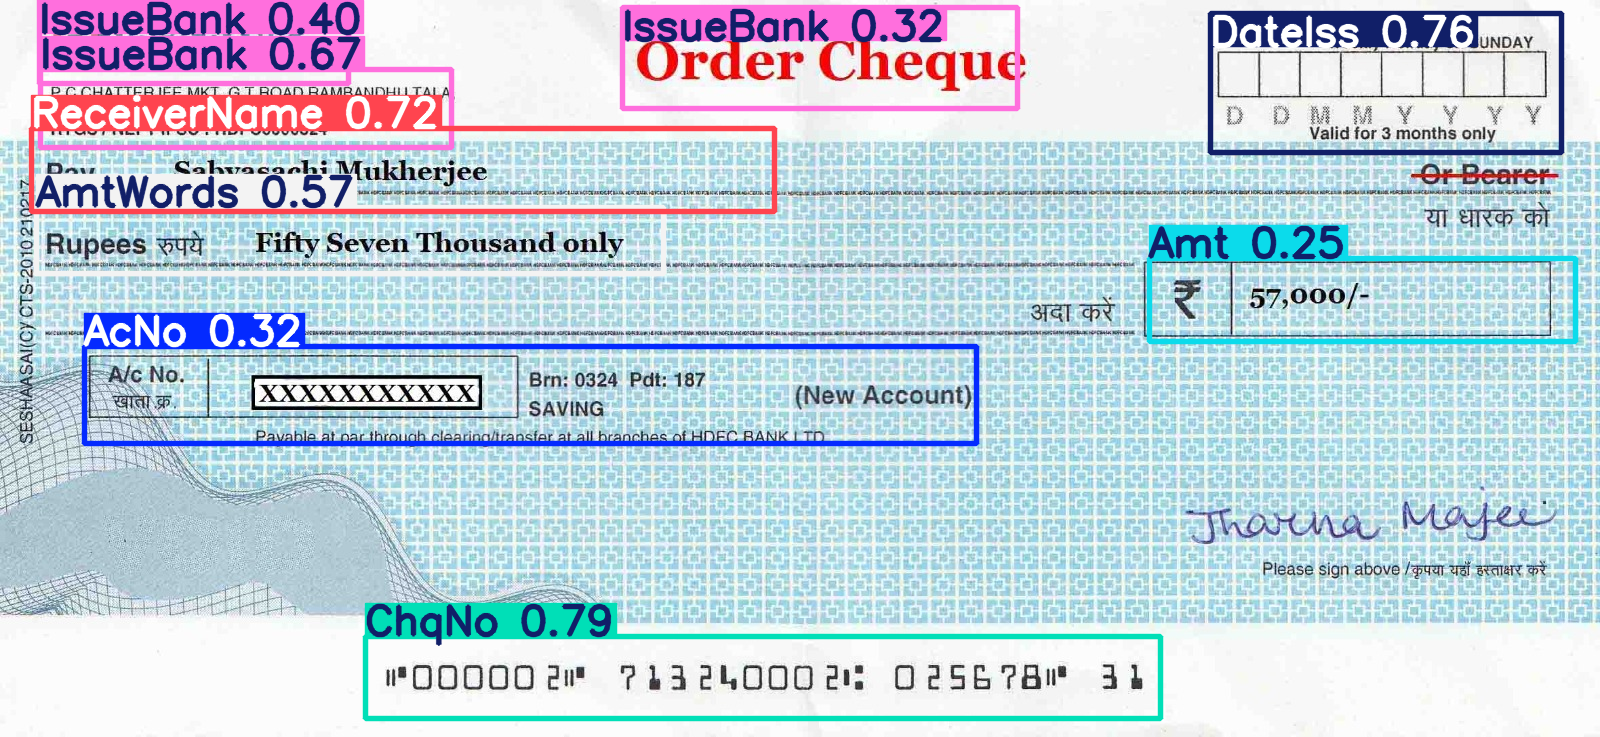

In [25]:
results[0].show()

# Testing inference with multiple images

For images from Local Uploads

In [89]:
image_path = '/content/*.jpeg'
jpeg_files = sorted(glob.glob(image_path))
results = model(jpeg_files)


0: 640x640 1 AcNo, 1 Amt, 1 AmtWords, 1 ChqNo, 2 DateIsss, 4 IssueBanks, 1 ReceiverName, 224.5ms
1: 640x640 1 AcNo, 1 Amt, 1 AmtWords, 1 ChqNo, 1 DateIss, 1 IssueBank, 1 ReceiverName, 1 Sign, 224.5ms
Speed: 3.9ms preprocess, 224.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


For images from Google Drive

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [102]:
%cd /content
!cp '/content/drive/MyDrive/Cheque Segmentation Yolov8.zip' data_yolov8.zip; unzip data_yolov8.zip; rm data_yolov8.zip

/content
Archive:  data_yolov8.zip
   creating: Cheque Segmentation Yolov8/
   creating: Cheque Segmentation Yolov8/images/
   creating: Cheque Segmentation Yolov8/images/train/
  inflating: Cheque Segmentation Yolov8/images/train/Cheque001.jpg  
  inflating: Cheque Segmentation Yolov8/images/train/Cheque002.jpg  
  inflating: Cheque Segmentation Yolov8/images/train/Cheque003.jpg  
  inflating: Cheque Segmentation Yolov8/images/train/Cheque004.jpg  
  inflating: Cheque Segmentation Yolov8/images/train/Cheque005.jpg  
  inflating: Cheque Segmentation Yolov8/images/train/Cheque006.jpg  
  inflating: Cheque Segmentation Yolov8/images/train/Cheque007.jpg  
  inflating: Cheque Segmentation Yolov8/images/train/Cheque008.jpg  
  inflating: Cheque Segmentation Yolov8/images/train/Cheque009.jpg  
  inflating: Cheque Segmentation Yolov8/images/train/Cheque010.jpg  
  inflating: Cheque Segmentation Yolov8/images/train/Cheque011.jpg  
  inflating: Cheque Segmentation Yolov8/images/train/Cheque012.

In [108]:
image_path = '/content/Cheque Segmentation Yolov8/images/train/*.jpg'
jpeg_files = sorted(glob.glob(image_path))
results = model(jpeg_files)


0: 640x640 1 AcNo, 1 Amt, 1 AmtWords, 1 ChqNo, 1 DateIss, 1 IssueBank, 1 ReceiverName, 1 Sign, 476.4ms
1: 640x640 1 AcNo, 1 Amt, 1 AmtWords, 1 ChqNo, 1 DateIss, 1 IssueBank, 1 ReceiverName, 1 Sign, 476.4ms
2: 640x640 1 AcNo, 1 Amt, 1 AmtWords, 1 ChqNo, 1 DateIss, 1 IssueBank, 1 ReceiverName, 1 Sign, 476.4ms
3: 640x640 1 AcNo, 1 Amt, 1 AmtWords, 1 ChqNo, 1 DateIss, 1 IssueBank, 1 ReceiverName, 1 Sign, 476.4ms
4: 640x640 1 AcNo, 1 Amt, 1 AmtWords, 1 ChqNo, 1 DateIss, 1 IssueBank, 1 ReceiverName, 1 Sign, 476.4ms
5: 640x640 1 AcNo, 1 Amt, 1 AmtWords, 1 ChqNo, 1 DateIss, 1 IssueBank, 1 ReceiverName, 1 Sign, 476.4ms
6: 640x640 1 AcNo, 1 Amt, 2 AmtWordss, 2 ChqNos, 1 DateIss, 1 IssueBank, 1 ReceiverName, 1 Sign, 476.4ms
7: 640x640 1 AcNo, 1 Amt, 1 AmtWords, 1 ChqNo, 1 DateIss, 1 IssueBank, 1 ReceiverName, 1 Sign, 476.4ms
8: 640x640 1 AcNo, 1 Amt, 2 AmtWordss, 1 ChqNo, 1 DateIss, 1 IssueBank, 1 ReceiverName, 1 Sign, 476.4ms
9: 640x640 1 AcNo, 1 Amt, 1 AmtWords, 1 ChqNo, 1 DateIss, 1 IssueBank

In [109]:
jpeg_count = len(jpeg_files)
jpeg_count

print(jpeg_files)

image_names_list = sorted([os.path.splitext(os.path.basename(file))[0] for file in jpeg_files])
image_names_list

['/content/Cheque Segmentation Yolov8/images/train/Cheque001.jpg', '/content/Cheque Segmentation Yolov8/images/train/Cheque002.jpg', '/content/Cheque Segmentation Yolov8/images/train/Cheque003.jpg', '/content/Cheque Segmentation Yolov8/images/train/Cheque004.jpg', '/content/Cheque Segmentation Yolov8/images/train/Cheque005.jpg', '/content/Cheque Segmentation Yolov8/images/train/Cheque006.jpg', '/content/Cheque Segmentation Yolov8/images/train/Cheque007.jpg', '/content/Cheque Segmentation Yolov8/images/train/Cheque008.jpg', '/content/Cheque Segmentation Yolov8/images/train/Cheque009.jpg', '/content/Cheque Segmentation Yolov8/images/train/Cheque010.jpg', '/content/Cheque Segmentation Yolov8/images/train/Cheque011.jpg', '/content/Cheque Segmentation Yolov8/images/train/Cheque012.jpg', '/content/Cheque Segmentation Yolov8/images/train/Cheque013.jpg', '/content/Cheque Segmentation Yolov8/images/train/Cheque014.jpg', '/content/Cheque Segmentation Yolov8/images/train/Cheque015.jpg', '/content

['Cheque001',
 'Cheque002',
 'Cheque003',
 'Cheque004',
 'Cheque005',
 'Cheque006',
 'Cheque007',
 'Cheque008',
 'Cheque009',
 'Cheque010',
 'Cheque011',
 'Cheque012',
 'Cheque013',
 'Cheque014',
 'Cheque015',
 'Cheque016',
 'Cheque017',
 'Cheque018',
 'Cheque019',
 'Cheque020',
 'Cheque021',
 'Cheque022',
 'Cheque023',
 'Cheque024',
 'Cheque025',
 'Cheque026',
 'Cheque027',
 'Cheque028',
 'Cheque029',
 'Cheque030',
 'Cheque031',
 'Cheque032',
 'Cheque033',
 'Cheque034',
 'Cheque035',
 'Cheque036',
 'Cheque037',
 'Cheque038',
 'Cheque039',
 'Cheque040',
 'Cheque041',
 'Cheque042',
 'Cheque043',
 'Cheque044',
 'Cheque045',
 'Cheque046',
 'Cheque047',
 'Cheque048',
 'Cheque049',
 'Cheque050',
 'Cheque051',
 'Cheque052',
 'Cheque053',
 'Cheque054',
 'Cheque055',
 'Cheque056',
 'Cheque057',
 'Cheque058',
 'Cheque059',
 'Cheque060',
 'Cheque061',
 'Cheque062',
 'Cheque063',
 'Cheque064',
 'Cheque065',
 'Cheque067',
 'Cheque068',
 'Cheque069',
 'Cheque070',
 'Cheque072',
 'Cheque073',
 'Cheq

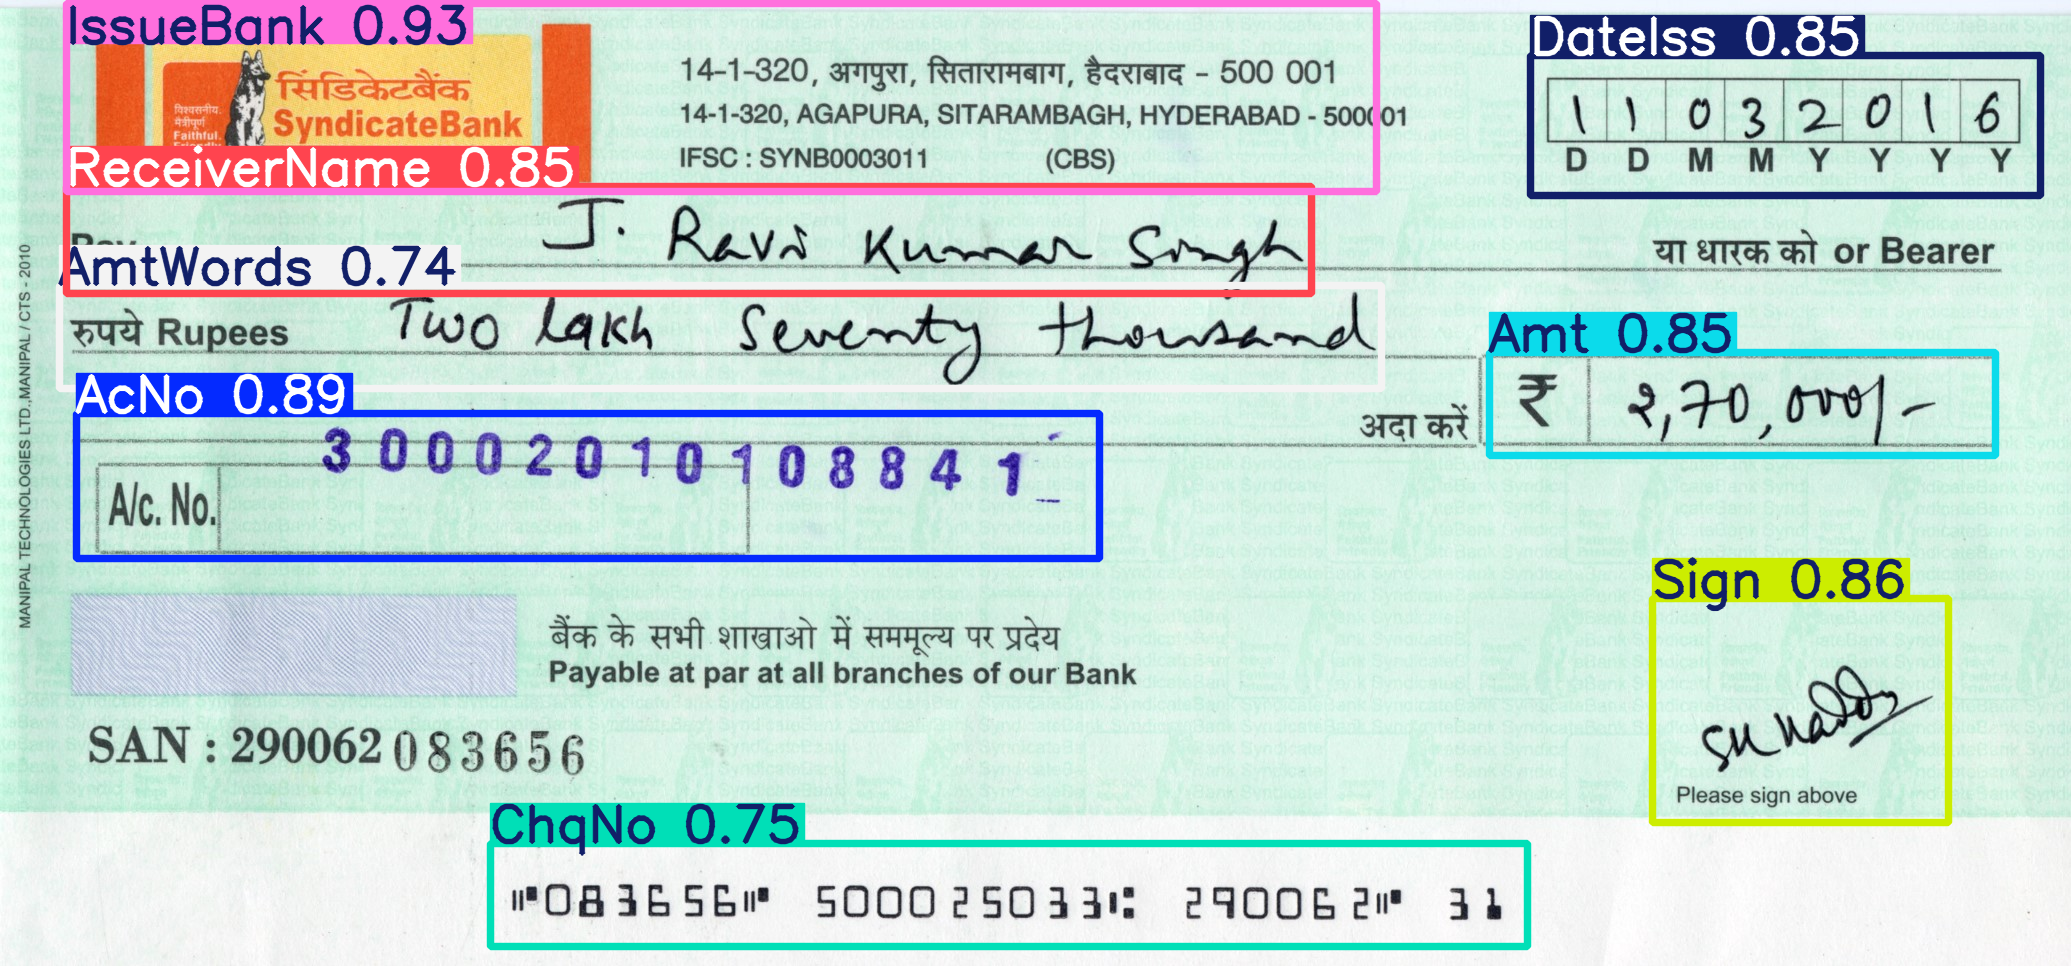

In [88]:
results[1].show()

In [110]:
class_names = ['AcNo', 'Amt', 'AmtWords', 'ChqNo', 'DateIss', 'IssueBank', 'ReceiverName', 'Sign']
# Directory to save the cropped images
output_dir = "/content/output/"
os.makedirs(output_dir, exist_ok=True)

for i in range(0,jpeg_count):
  best_detections = {}

  for detection in results[i].boxes:
      # Extract class, confidence, and bounding box tensor
      cls = int(detection.cls.item())  # Convert class tensor to int
      conf = detection.conf.item()     # Confidence score
      bbox = detection.xyxy.squeeze().tolist()   # Bounding box coordinates (x1, y1, x2, y2)

      # Update the dictionary with the highest confidence detection per class
      if cls not in best_detections or conf > best_detections[cls]["conf"]:
          best_detections[cls] = {"conf": conf, "bbox": bbox}

  # Loop through each detection and save the cropped region
  for cls, detection in best_detections.items():
      cls_index = cls
      bbox = detection['bbox']

      # Round the bounding box coordinates to integer values
      x1, y1, x2, y2 = map(int, bbox)

      # Load the original image
      image = Image.open(jpeg_files[i])

      # Crop the region from the image
      cropped_image = image.crop((x1, y1, x2, y2))

      # Get the class name for naming the file
      class_name = class_names[cls_index]

      # Save the cropped image
      cropped_image_path = f"{output_dir}{image_names_list[i]}_{class_name}.jpg"
      cropped_image.save(cropped_image_path)
      print(f"Cropped region for {class_name} saved to {cropped_image_path}")

Cropped region for IssueBank saved to /content/output/Cheque001_IssueBank.jpg
Cropped region for Amt saved to /content/output/Cheque001_Amt.jpg
Cropped region for AcNo saved to /content/output/Cheque001_AcNo.jpg
Cropped region for ReceiverName saved to /content/output/Cheque001_ReceiverName.jpg
Cropped region for DateIss saved to /content/output/Cheque001_DateIss.jpg
Cropped region for AmtWords saved to /content/output/Cheque001_AmtWords.jpg
Cropped region for Sign saved to /content/output/Cheque001_Sign.jpg
Cropped region for ChqNo saved to /content/output/Cheque001_ChqNo.jpg
Cropped region for IssueBank saved to /content/output/Cheque002_IssueBank.jpg
Cropped region for AcNo saved to /content/output/Cheque002_AcNo.jpg
Cropped region for Sign saved to /content/output/Cheque002_Sign.jpg
Cropped region for DateIss saved to /content/output/Cheque002_DateIss.jpg
Cropped region for Amt saved to /content/output/Cheque002_Amt.jpg
Cropped region for ReceiverName saved to /content/output/Chequ

In [111]:
import shutil

folder_path = '/content/output/'
zip_path = '/content/extracted_images.zip'

# Zip the folder
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)

'/content/extracted_images.zip'

In [112]:
from google.colab import files

# Download the zipped file
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>